###General

In [ ]:
from google.colab import drive
from os import chdir

drive.mount("/content/drive")
chdir("/content/drive/MyDrive/Machine_Learning/Ergasia2/images") #Change to where the 'images' folder is on the drive
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
F10.jpg  F4.jpg  F8.jpg   S2.jpg  S6.jpg  W10.jpg  W4.jpg  W8.jpg
F1.jpg	 F5.jpg  F9.jpg   S3.jpg  S7.jpg  W1.jpg   W5.jpg  W9.jpg
F2.jpg	 F6.jpg  S10.jpg  S4.jpg  S8.jpg  W2.jpg   W6.jpg
F3.jpg	 F7.jpg  S1.jpg   S5.jpg  S9.jpg  W3.jpg   W7.jpg


In [1]:
#Imports
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox,OffsetImage
%matplotlib inline

###Ερωτημα 1


>I.

In [ ]:
def loadImages(path):
    image_data = []
    labels = []
    names = []
    for image in os.listdir(path):
        names.append(image)
        image_data.append(np.asarray(PIL.Image.open(image).resize((100,100))).reshape(1, -1)[0])
        if 'W' in image:
            labels.append(0)
        elif 'F' in image:
            labels.append(1)
        elif 'S' in image:
            labels.append(2)
    return image_data, labels, names 

In [ ]:
image_data, labels, names = loadImages("/content/drive/MyDrive/Machine_Learning/Ergasia2/images")   
print(image_data)
print(labels)

[array([59, 67, 27, ..., 44, 43, 41], dtype=uint8), array([ 61,  66,  75, ..., 121, 134, 147], dtype=uint8), array([158, 164, 166, ..., 165, 164, 173], dtype=uint8), array([ 2,  2,  1, ..., 23, 23, 14], dtype=uint8), array([173, 230, 253, ..., 116, 127,  17], dtype=uint8), array([ 1,  5,  1, ..., 23, 69,  5], dtype=uint8), array([ 93,  63,   5, ..., 115,  71,  38], dtype=uint8), array([43, 62, 90, ..., 21, 33, 58], dtype=uint8), array([ 72,  74,  86, ..., 219, 225, 237], dtype=uint8), array([1, 1, 1, ..., 3, 4, 1], dtype=uint8), array([148, 152, 156, ..., 201, 206, 225], dtype=uint8), array([ 74,  67,  65, ..., 192, 195, 200], dtype=uint8), array([142, 147, 161, ..., 201, 204, 221], dtype=uint8), array([141, 147, 159, ..., 200, 203, 221], dtype=uint8), array([ 52,  64,  52, ..., 117, 105,  96], dtype=uint8), array([17, 16, 18, ..., 28, 15,  3], dtype=uint8), array([51, 60, 69, ..., 97, 59, 28], dtype=uint8), array([193, 208, 215, ..., 175, 189, 198], dtype=uint8), array([142, 137,  77,

>II.

Συναρτηση για την επιστροφη του επιθυμητου plot

In [ ]:
def return_plot(plotData):

    x = [x[0] for x in plotData]
    y = [y[1] for y in plotData]
    names = [name[2] for name in plotData]
    fig, ax = plt.subplots()
    plt.axis('off') 

    for x0, y0, path in zip(x, y,names):
        ab = AnnotationBbox(OffsetImage(plt.imread(path), zoom= 0.125), (x0, y0), frameon=False)
        ax.add_artist(ab)
    ax.scatter(x,y)    
    return fig

H PCA_ImageSpaceVisualization συναρτηση εχει και αλλα δυο ορισματα για να ειναι πιο ξεκαθαρη η χρηση της. Το image names ειναι για τα legend των plot και το plot ειναι μια boolean μεταβλητη για να μπορουμε να επιλεγουμε εαν θελουμε την δημιουργία του διαγράμματος σε δύο διαστάσεις των images

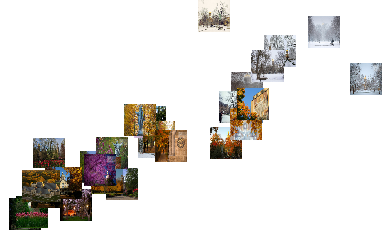

In [ ]:
def PCA_ImageSpaceVisualization(X, images_names, plot = 1):
    plot_data = []
    data_2d = []
    for t, (unformated_image, names) in enumerate(zip(X, images_names)):
        image = unformated_image.reshape(3,-1)

        #Covariance matrix
        meanX=np.mean(image[0,:])
        meanY=np.mean(image[1,:])
        meanZ=np.mean(image[2,:]) 
        meanVector=np.array([[meanX],[meanY],[meanZ]])

        #Scatter Matrix
        dim=image.shape[0]
        samplesNum=image.shape[1]
        scatterMat = np.zeros((dim,dim))
        for i in range(samplesNum):
            scatterMat += (image[:,i].reshape(3,-1) - meanVector).dot((image[:,i].reshape(3,-1) - meanVector).T)

        #Eigen values and vectors
        eigValue, eigVector = np.linalg.eig(scatterMat)
        
        #We want only 2 dimensions
        wanted_dims=2
        aDict={}
        selectededEigenVectors=[]
        for a in zip(eigValue, eigVector):
            aDict[abs(a[0])]=abs(a[1])

        for n, aKey in enumerate(sorted(aDict,reverse=True)):
            selectededEigenVectors+=[aDict[aKey].reshape(3,1)]
            if n==wanted_dims-1:
                break

        w=np.hstack(selectededEigenVectors)
        imageTrans = w.T.dot(image)
        data_2d.append(imageTrans[0,:] + imageTrans[1,:])
        if plot:
            if t % 4 == 0: #Each figure has only 4 images's plot
                plt.figure()
            
            plt.scatter(imageTrans[0,:], imageTrans[1,:], label=names)
            #plt.scatter(imageTrans[0,20:40], imageTrans[1,20:40], label=names) #plot some of the data (20"40)
            plt.legend()
            plt.title('Data after PCA ')

        plot_data.append([abs(np.mean(imageTrans[0,:])+labels[t]) , abs(np.mean(imageTrans[1,:])+labels[t]), names]) #For the returned plot

    return return_plot(plot_data), data_2d 

fig, data_2d = PCA_ImageSpaceVisualization(image_data, names, plot=False) #If plot=True then for every image a scatter plot will show
fig.show()

Uncomment and re-run it to see the scatter plots of each image in the kept 2 dimensions

In [ ]:
# fig, data_2d = PCA_ImageSpaceVisualization(image_data, names, plot=True)
# fig.show()

>III.

Οσο πιο κοντα ειναι δυο εικονες τοσο πιο 'ιδιες' ειναι, δηλαδη, εχουν παρομοιους χρωματισμους, παρομοια μοτιβα. Οπως βλεπουμε στο figure παραπανω, οσο πιο δεξια ειναι μια φωτογραφια ειναι πιο χειμωνιατικη και οσο πιο δεξια πιο ανοιξιατικη. Οταν δυο φωτογραφιες απεχουν πολυ τοτε διαφερουν στα παραπανω κριτηρια.

Οσον αφορα το αν μπορουμε να γενικευσουμε, οι φωτογραφιες αρχικα ειχαν data σε 3 διαστασεις και εμεις κρατησαμε μονο τις 2, αρα μειωσαμε τα δεδομενα που ειχαμε κατα 33%. Παρολα αυτα επειδη τα δεδομενα επαναλαμβανονται και λογω των μοτιβων της εκαστοτε φωτογραφιας, μπορουμε να γενικευσουμε την συγκριση αυτη και σε μεγαλυτερες διαστασεις

>IV.

Αυτη η ομαδοποιηση συμβανει διοτι, οπως ειπα και παραπανω, η αναλυση που εγινε σε καθε φωτογραφια ειχε ως αποτελεσμα να κρατηθουν λιγοτερα δεδομενα απο τα αρχικα της καθε φωτογραφιας. Επειδη ομως οι φωτογραφιες της καθε εποχης εχουν κοινα χαρακτηριστικα, χρωμα, μοτιβα, αντιθεσεις χρωματων, ειναι λογικο να εχουμε τετοια ομαδοποιηση. Εαν ειχαμε μια ακομα φωτογραφια με ενα χιονισμενο τοπιο τοτε το πιο πιθανο ειναι οτι θα τοποθετουνταν αρκετα πανω και δεξια στο παραπανω figure

>V.

Part 1 - Xρησιμοποιώντας τις αρχικές μεγάλης διάστασης εικόνες σε μορφή διανύσματος 

1-NN

In [ ]:
mean_accuracy_list = []
from sklearn.model_selection import cross_val_score
X = image_data
y = labels
nn_cl = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(nn_cl, X, y, cv=5)
print(scores)
mean_accuracy_list.append(round(np.mean(scores)*100,4))
print("Mean accuracy = {}%".format(round(np.mean(scores)*100,4)))

[0.66666667 0.66666667 0.83333333 0.83333333 0.66666667]
Mean accuracy = 73.3333%


3-NN

In [ ]:
nn_cl = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(nn_cl, X, y, cv=5)
print(scores)
mean_accuracy_list.append(round(np.mean(scores)*100,4))
print("Mean accuracy = {}%".format(round(np.mean(scores)*100,4)))

[1.         0.66666667 0.83333333 0.83333333 0.66666667]
Mean accuracy = 80.0%


Part 2 - Xρησιμοποιώντας τα χαρακτηριστικά χαμηλής διάστασης που εξέγαγα μέσω της PCA

1-ΝΝ

In [ ]:
X = data_2d
y = labels
nn_cl = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(nn_cl, X, y, cv=5)
print(scores)
mean_accuracy_list.append(round(np.mean(scores)*100,4))
print("Mean accuracy = {}%".format(round(np.mean(scores)*100,4)))

[0.83333333 0.66666667 0.66666667 0.66666667 1.        ]
Mean accuracy = 76.6667%


3-NN

In [ ]:
nn_cl = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(nn_cl, X, y, cv=5)
print(scores)
mean_accuracy_list.append(round(np.mean(scores)*100,4))
print("Mean accuracy = {}%".format(round(np.mean(scores)*100,4)))

[0.83333333 0.66666667 0.83333333 0.83333333 0.66666667]
Mean accuracy = 76.6667%


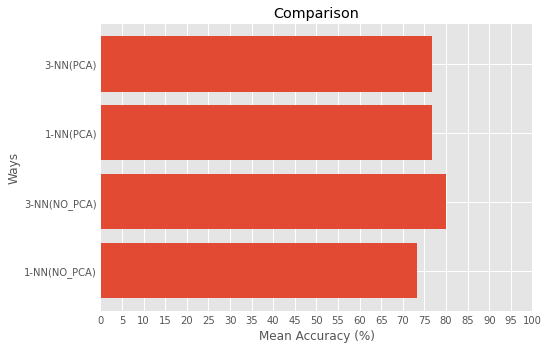

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
way = ['1-NN(NO_PCA)', '3-NN(NO_PCA)', '1-NN(PCA)', '3-NN(PCA)']
acc = mean_accuracy_list
ax.barh(way,acc)
plt.xticks([*range(0, 105, 5)])
plt.style.use('ggplot')
plt.title('Comparison')
plt.xlabel('Mean Accuracy (%)')
plt.ylabel('Ways')
plt.show()

###Ερωτημα 2


>I

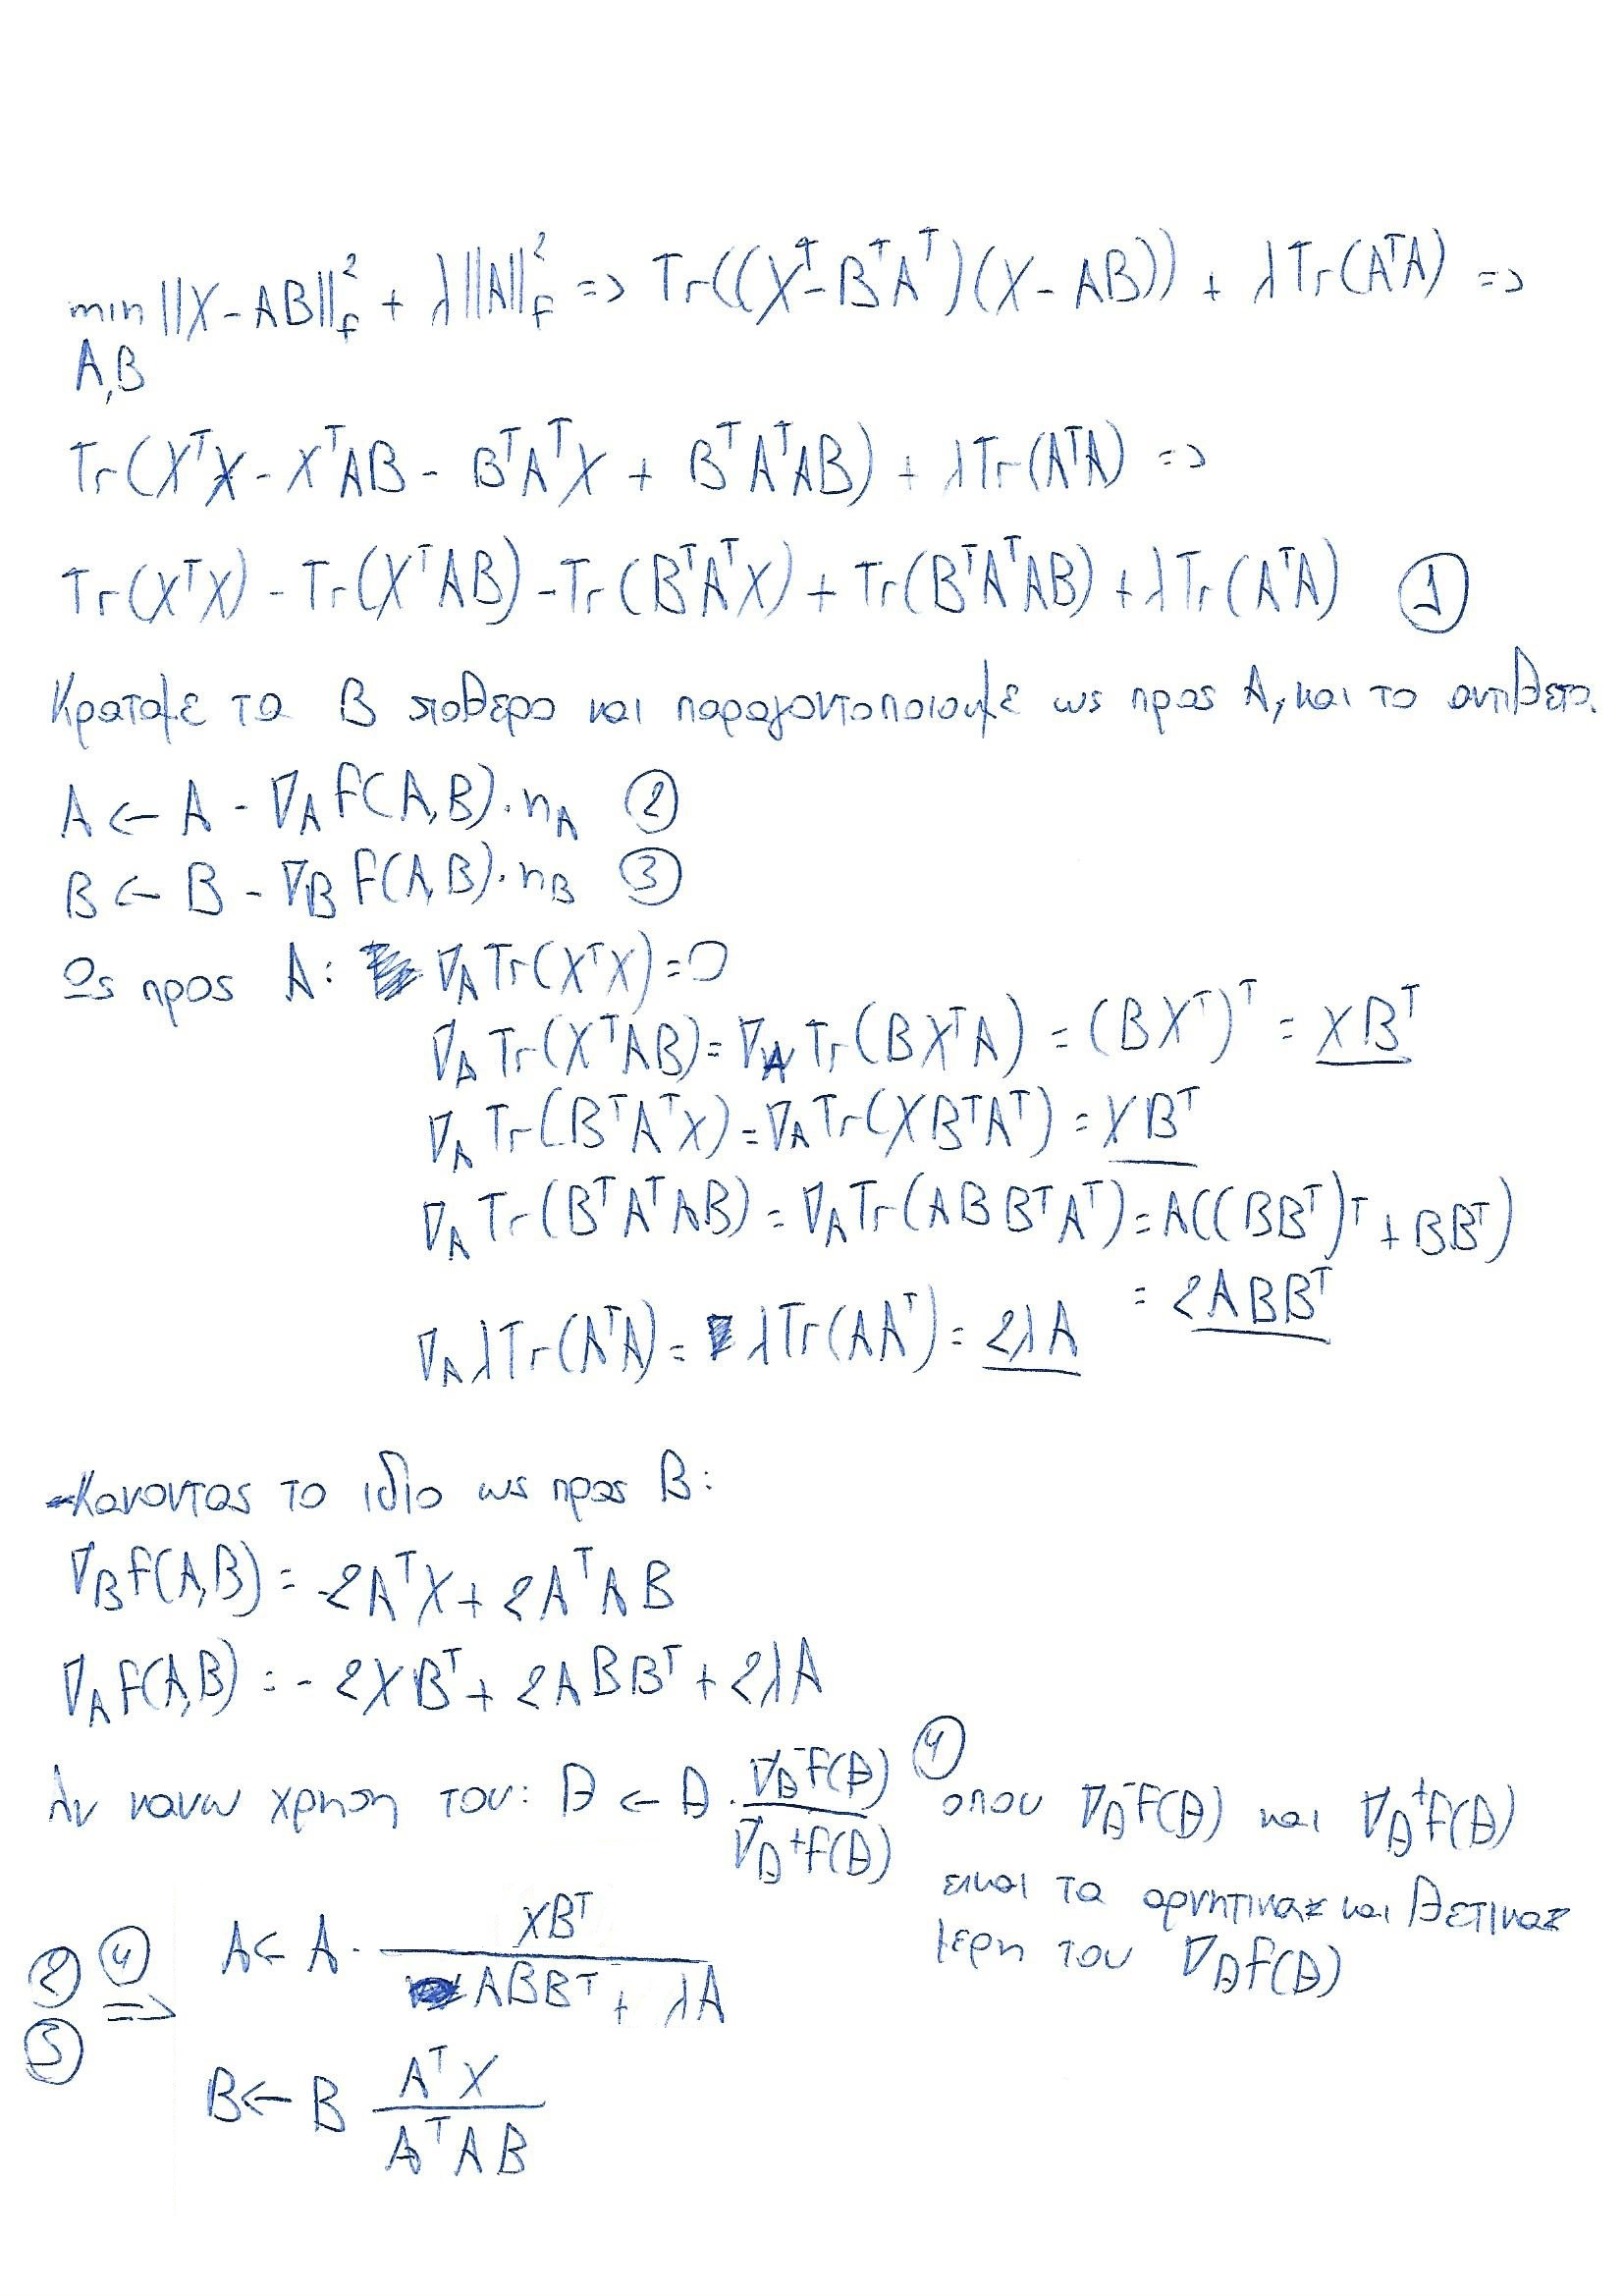

>II

In [53]:
def random_AB(X,k):
    rows = X.shape[0]
    cols = X.shape[1]
    A = np.random.rand(rows,k)
    B = np.random.rand(k,cols)
    return A,B

def RegNMF(X,k,lamda,epsilon):
    itter = 0
    A ,B = random_AB(X,k)
    error = 1
    old = (np.linalg.norm(X-(A.dot(B))))**2 / (np.linalg.norm(X))**2
    while error > epsilon:
        
        #Update A
        XB_T = X.dot(B.T)
        ABB_T = (A.dot(B)).dot(B.T)
        A_fraction = XB_T / (ABB_T + lamda*A)
        A = A*(A_fraction)

        #Update B
        A_TX = (A.T).dot(X)
        A_TAB = ((A.T).dot(A)).dot(B)
        B_fraction = A_TX / A_TAB
        B = B*(B_fraction)

        #Error
        new = (np.linalg.norm(X-(A.dot(B))))**2 / (np.linalg.norm(X))**2
        error = old - new
        old = new
        itter += 1
    #print(f"Total itterations: {itter}")    
    return A,B,itter

A = abs(np.random.rand(500, 10))
B = abs(np.random.rand(10, 500))
X = A.dot(B)
   

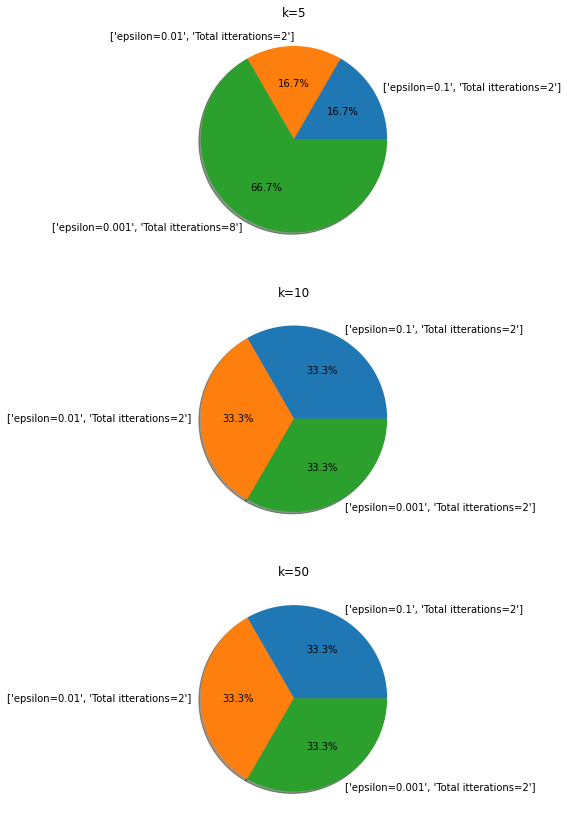

In [67]:
plt.figure(figsize=(30,30))
for index, k in enumerate([5,10,50]):
    k_list = []
    labels_list = []
    for epsilon in [0.1, 0.01, 0.001]:
        A_nmf, B_nmf, itter = RegNMF(X, k=k, lamda=0.5, epsilon=epsilon)
        k_list.append(itter)
        labels_list.append([f"epsilon={epsilon}",f"Total itterations={itter}"])
    plt.subplot(6, 1,index+1)
    plt.title(f"k={k}")
    plt.pie(k_list,labels=labels_list,shadow=True,autopct='%1.1f%%') 